This code script is used to play with the algorithm of community discovery we discussed in the lecture

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

# Create an example social network and consider it as bipartite

In [2]:
# Create a new graph
B = nx.Graph()

# Lists of nodes
list1 = ["jill", "nicky", "tessa", "aga", "ecka", "min"]
list2 = ["james", "peter", "john", "bill", "steven", "luna"]

# Add nodes with the node attribute "bipartite"
B.add_nodes_from(list1, bipartite=0)
B.add_nodes_from(list2, bipartite=1)

# Add edges
B.add_edge('jill','peter')
B.add_edge('jill','luna')
B.add_edge('jill','steven')
B.add_edge('nicky','james')
B.add_edge('nicky','peter')
B.add_edge('tessa','john')
B.add_edge('aga','bill')
B.add_edge('aga','luna')
B.add_edge('ecka','steven')
B.add_edge('ecka','john')
B.add_edge('min','peter')
B.add_edge('min','james')

# Look at the current bipartite view

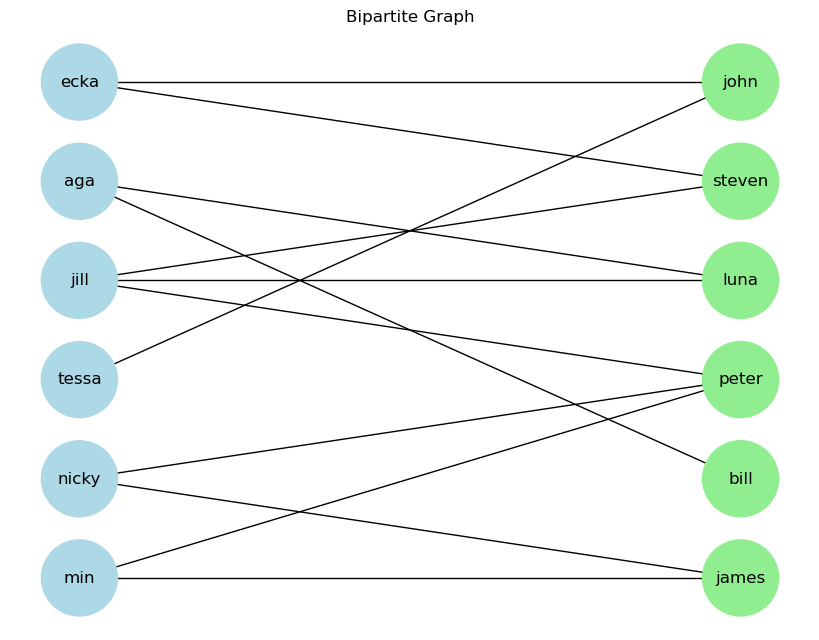

In [3]:
# Separate by group
left_set, right_set = bipartite.sets(B)

# Position nodes
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(left_set))
pos.update((node, (2, index)) for index, node in enumerate(right_set))

# Color for nodes
color_map = ['lightblue' if node in list1 else 'lightgreen' for node in B]

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(B, pos, with_labels=True, node_color=color_map, node_size=3000)
plt.title("Bipartite Graph")
plt.show()

# Calculate cuts in the graph

In [4]:
nx.cut_size(B, list1, list2)

12

**NOTE**: You may probably remember this value is different from what you define as Ncut in the lecture note:

$$
Ncut(S) = \frac{\sum_{i \in S, j \in \bar{S}} A(i, j)}{\sum_{i \in S} k_i} + \frac{\sum_{i \in S, j \in \bar{S}} A(i, j)}{\sum_{j \in \bar{S}} k_j}
$$

However, since our example here bipartite (there is no link inside the cluster, $\sum k_i = 0$), the above formula of `Ncut` can be re-defined as the same as `cut`.

# Swap to minimise the cut

In [5]:
def draw_partitioned_graph(graph, partition, position, title):
    """Draw the graph with the given partition and position."""
    color_map_partitioned = ['lightblue' if node in partition[0] else 'lightgreen' for node in graph]
    plt.figure(figsize=(8, 6))
    nx.draw(graph, position, with_labels=True, node_color=color_map_partitioned, node_size=3000)
    plt.title(title)
    plt.show()

In [6]:
def swap_cut_plot(B, pos, list1, list2):
    # Calculate the initial normalized cut size
    ncut0 = nx.cut_size(B, list1, list2)
    title = 'Original Ncut: ' + str(ncut0)
    # Draw the initial partition of the graph
    draw_partitioned_graph(B, [list1, list2], pos, title)

    # Iterate over each possible pair of nodes from list1 and list2
    for i in range(len(list1)):
        for j in range(len(list2)):
            # Store the current bipartite attribute of the nodes
            temp1 = B.nodes[list1[i]]['bipartite']
            temp2 = B.nodes[list2[j]]['bipartite']
            
            # Swap the nodes between list1 and list2
            list1[i], list2[j] = list2[j], list1[i]
            
            # Update the bipartite attribute after swapping
            B.nodes[list1[i]]['bipartite'] = temp2
            B.nodes[list2[j]]['bipartite'] = temp1

            # Calculate the new normalized cut size after swapping
            ncut = nx.cut_size(B, list1, list2)

            # If the new normalized cut size is smaller, update and plot the graph
            if ncut < ncut0:
                ncut0 = ncut
                title = "Ncut after swapping: " + str(ncut)
                draw_partitioned_graph(B, [list1, list2], pos, title)
            else:
                # Swap the nodes back to their original lists if no improvement
                list1[i], list2[j] = list2[j], list1[i]
                B.nodes[list1[i]]['bipartite'] = temp1
                B.nodes[list2[j]]['bipartite'] = temp2

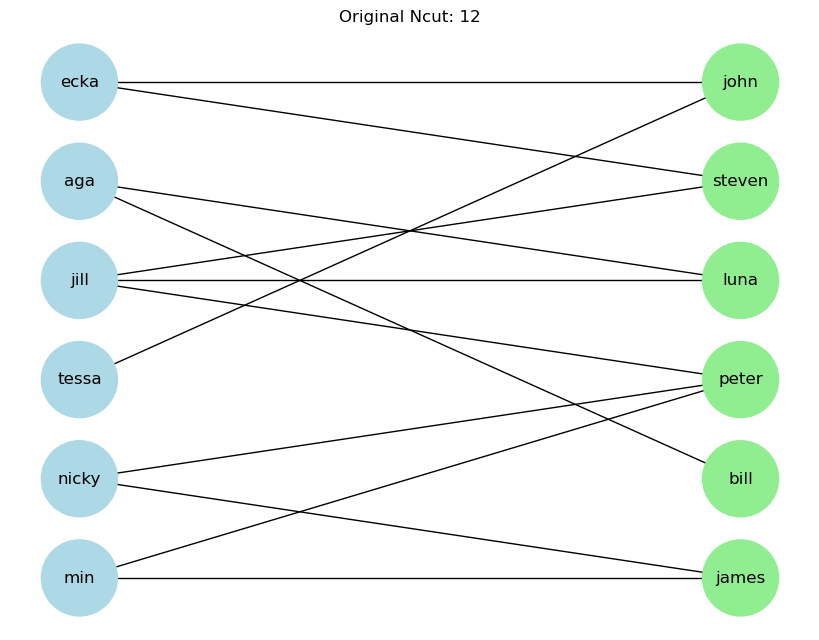

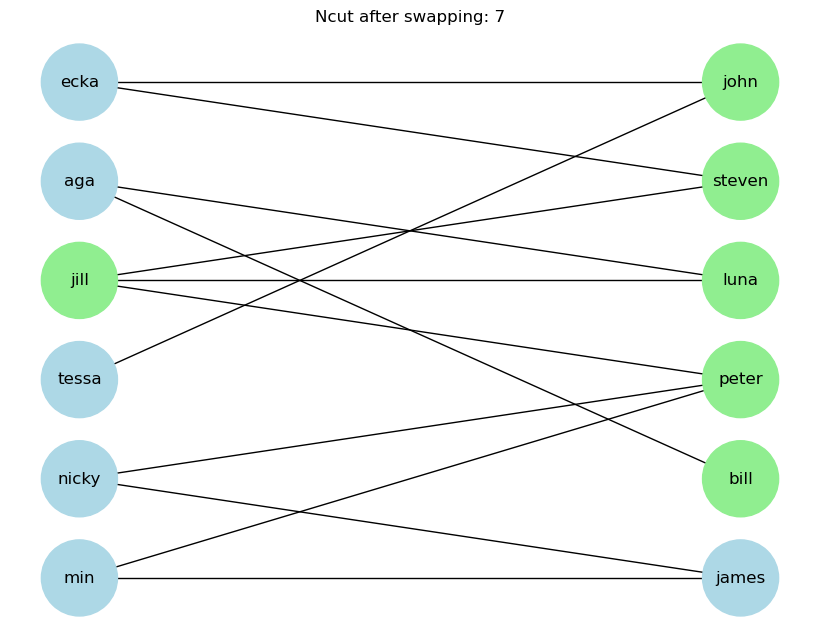

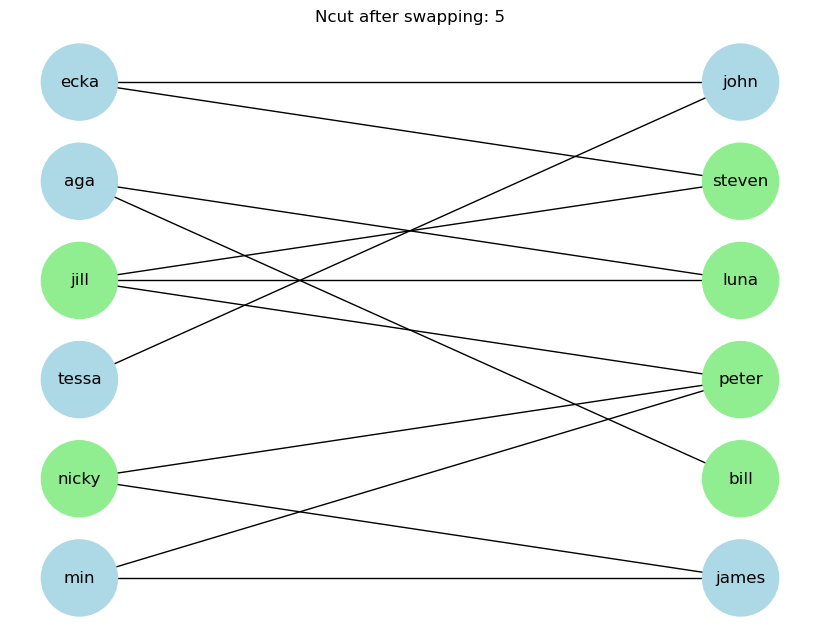

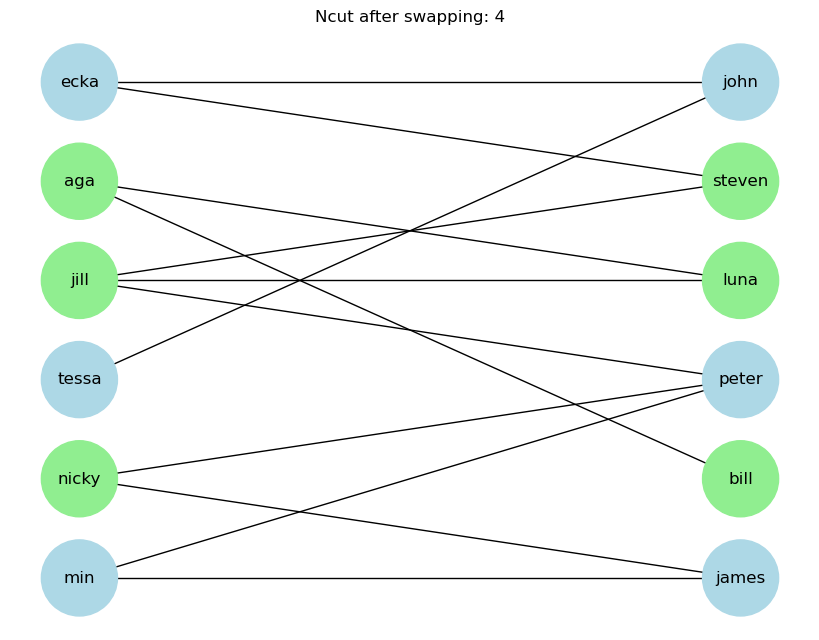

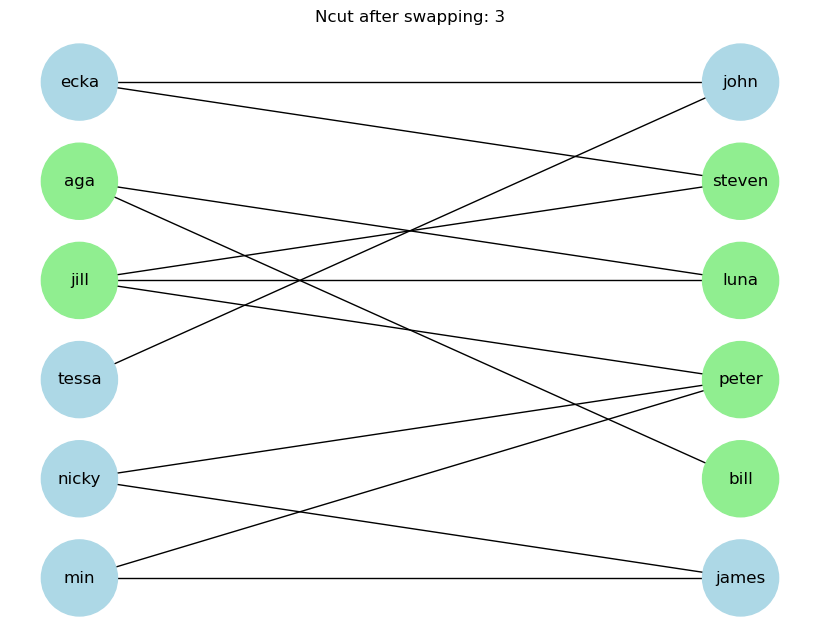

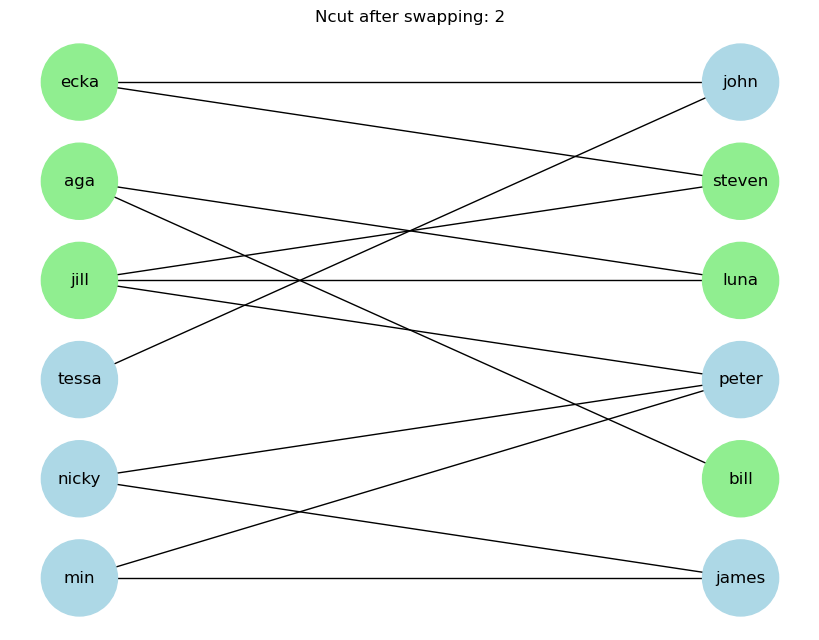

In [7]:
swap_cut_plot(B, pos,list1, list2)

# we can also use `networkx` build-in function `algorithms.community.kernighan_lin.kernighan_lin_bisectio`

In [8]:
# Create a new graph
G = nx.Graph()

# Lists of nodes
list1 = ["jill", "nicky", "tessa", "aga", "ecka", "min"]
list2 = ["james", "peter", "john", "bill", "steven", "luna"]

# Add nodes with the node attribute "bipartite"
G.add_nodes_from(list1, bipartite=0)
G.add_nodes_from(list2, bipartite=1)

# Add edges
G.add_edge('jill','peter')
G.add_edge('jill','luna')
G.add_edge('jill','steven')
G.add_edge('nicky','james')
G.add_edge('nicky','peter')
G.add_edge('tessa','john')
G.add_edge('aga','bill')
G.add_edge('aga','luna')
G.add_edge('ecka','steven')
G.add_edge('ecka','john')
G.add_edge('min','peter')
G.add_edge('min','james')

In [9]:
# Running the Kernighan-Lin bipartition algorithm on the graph

# The Kernighan-Lin algorithm is a heuristic algorithm for partitioning a graph into two equally sized sets
# while minimizing the edge cut between them.

# Since the graph B is already a bipartite graph, we can directly apply the Kernighan-Lin algorithm
partition = nx.algorithms.community.kernighan_lin.kernighan_lin_bisection(G)

# The result is a tuple of two sets of nodes, representing the partition of the graph
partition

({'aga', 'bill', 'james', 'min', 'nicky', 'peter'},
 {'ecka', 'jill', 'john', 'luna', 'steven', 'tessa'})

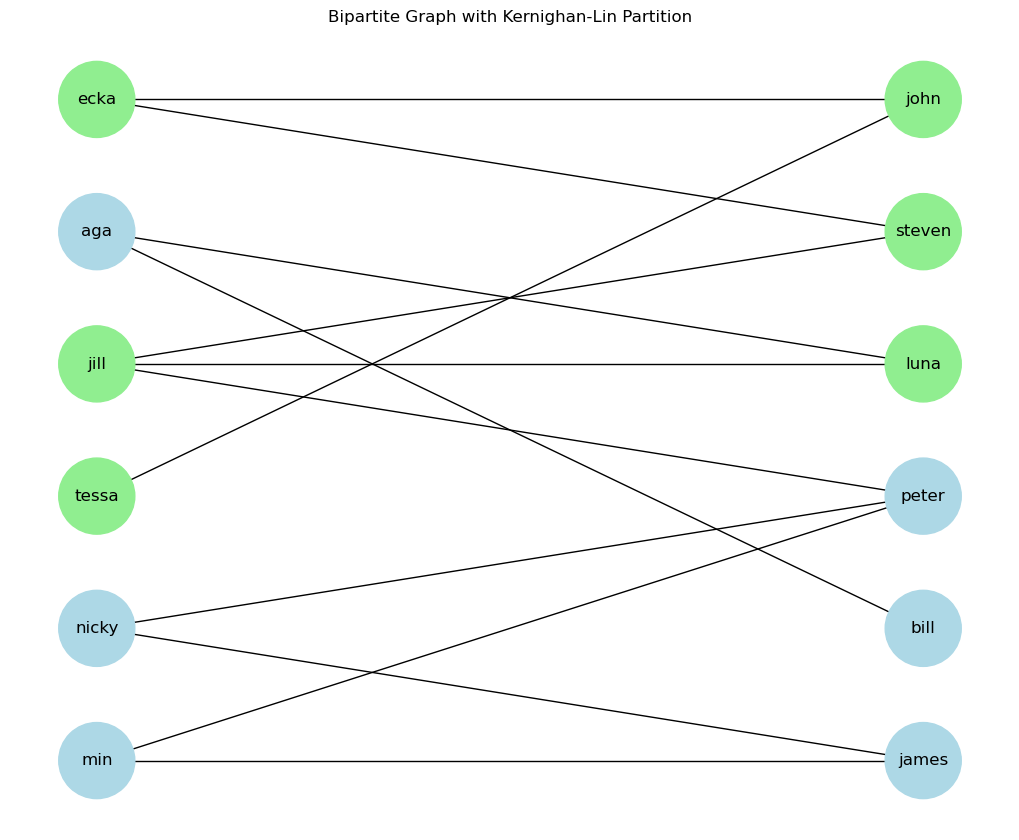

In [10]:
# Extracting the two partitions
partition1, partition2 = partition

# Assigning different colors for each partition
color_map_partitioned = ['lightblue' if node in partition1 else 'lightgreen' for node in G]

# Draw the graph with the new partition coloring
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color=color_map_partitioned, node_size=3000)
plt.title("Bipartite Graph with Kernighan-Lin Partition")
plt.show()

In [11]:
# Let's look at the cut
nx.cut_size(G, partition1, partition2)

2

# Can you investigate the differences between above results? And why?